<a href="https://colab.research.google.com/github/Sakshi1007/MLnow_2.0/blob/main/Mobile_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
cd'/content/drive/MyDrive/ColabNotebooks'

/content/drive/MyDrive/ColabNotebooks


In [114]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [115]:
df=pd.read_csv("Mobile Price.csv")

In [116]:
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


In [117]:
df.shape

(2000, 21)

In [118]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [120]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [121]:
column=df.columns
print(column)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


**DATA SPLIT**

In [122]:
y=df['price_range']
x=df.drop('price_range',axis=1)

In [123]:
print(x)
print(y)

      battery_power  blue  clock_speed  ...  three_g  touch_screen  wifi
0               842     0          2.2  ...        0             0     1
1              1021     1          0.5  ...        1             1     0
2               563     1          0.5  ...        1             1     0
3               615     1          2.5  ...        1             0     0
4              1821     1          1.2  ...        1             1     0
...             ...   ...          ...  ...      ...           ...   ...
1995            794     1          0.5  ...        1             1     0
1996           1965     1          2.6  ...        1             1     1
1997           1911     0          0.9  ...        1             1     0
1998           1512     0          0.9  ...        1             1     1
1999            510     1          2.0  ...        1             1     1

[2000 rows x 20 columns]
0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    

**Feature Selection**

In [124]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [167]:
best_feat=SelectKBest(score_func=chi2, k=12)
fit=best_feat.fit(x,y)
data_score=pd.DataFrame(fit.scores_)
data_specs=pd.DataFrame(x.columns)
data_Features=pd.concat([data_score,data_specs],axis=1)
data_Features.columns=['Scores','Specs']
print(data_Features.nlargest(12,'Scores'))

           Scores          Specs
13  931267.519053            ram
11   17363.569536      px_height
0    14129.866576  battery_power
12    9810.586750       px_width
8       95.972863      mobile_wt
6       89.839124     int_memory
15      16.480319           sc_w
16      13.236400      talk_time
4       10.135166             fc
14       9.614878           sc_h
10       9.186054             pc
9        9.097556        n_cores


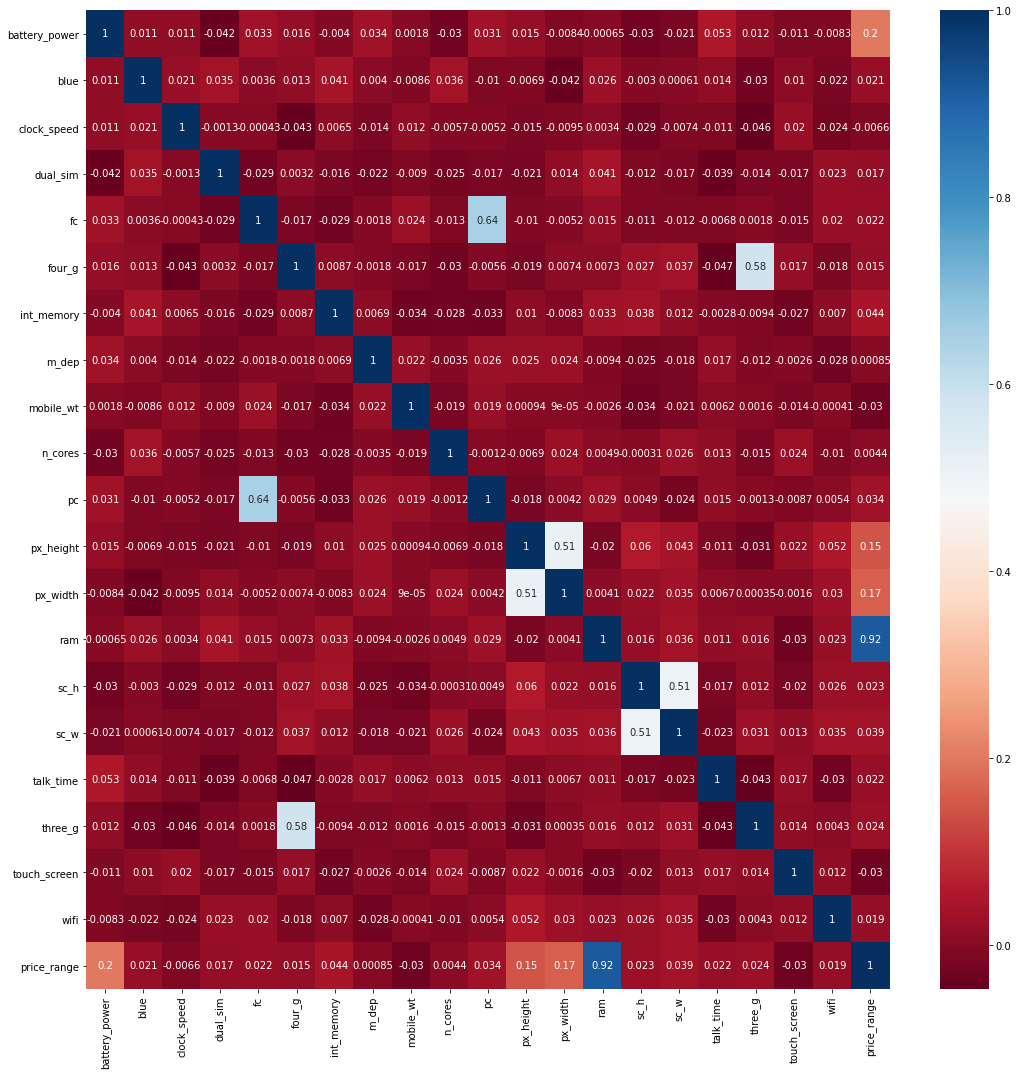

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
corr=df.corr()
top_corr=corr.index
plt.figure(figsize=(18,18))
sns.heatmap(df[top_corr].corr(),annot=True,cmap='RdBu')

In [169]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [170]:
best_features=data_Features.nlargest(10,'Scores')
feat_names=best_features['Specs']
feat_names=feat_names.to_numpy()

In [171]:
feat_names=feat_names.tolist()
X=df[feat_names]
X.head(10)

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,talk_time,fc,sc_h
0,2549,20,842,756,188,7,7,19,1,9
1,2631,905,1021,1988,136,53,3,7,0,17
2,2603,1263,563,1716,145,41,2,9,2,11
3,2769,1216,615,1786,131,10,8,11,0,16
4,1411,1208,1821,1212,141,44,2,15,13,8
5,1067,1004,1859,1654,164,22,1,10,3,17
6,3220,381,1821,1018,139,10,8,18,4,13
7,700,512,1954,1149,187,24,3,5,0,16
8,1099,386,1445,836,174,53,1,20,0,17
9,513,1137,509,1224,93,9,10,12,2,19


**Hyperparameter Tuning**

In [172]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

C=[0.01,0.03,0.1,0.3,1,3,10,30,100,300,1000]
gamma=[0.01,0.03,0.1,0.3,1,3,10,30,100]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=30,test_size=0.2)
scaler=StandardScaler()
cols=X.columns
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=cols)
X_train.head(10)

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,talk_time,fc,sc_h
0,0.932435,-1.172466,-0.795535,0.774484,0.659880,-0.871035,-1.333280,-1.276235,0.384024,-1.286470
1,-0.234590,-1.220354,-0.617360,-1.510832,1.569496,1.182212,0.959549,0.913356,0.155948,0.147922
2,0.316068,-1.270523,-0.370654,-0.982917,-1.130926,0.571788,-0.416148,-0.728838,1.980562,-1.286470
3,1.145295,-1.051604,0.721244,0.737437,0.603029,-1.425966,-1.103997,-1.458701,0.384024,-0.808339
4,1.112903,0.410135,-0.939447,0.290562,-1.358330,0.793760,-1.333280,1.460754,-0.984436,-1.047404
5,-1.288708,-0.625169,1.708065,-1.452947,-1.671011,0.571788,-0.186866,-0.181440,-0.756360,-1.525535
6,-1.011065,-1.005996,-0.443752,-0.378594,-0.164459,1.737144,-0.645431,0.365958,1.068255,-0.330209
7,-1.408094,-0.538513,-0.898329,-1.385800,-0.221310,-0.149623,2.564529,-0.181440,0.384024,1.582313
8,1.468286,0.077196,-0.891476,-1.158889,1.683198,-1.592446,0.500983,-0.546372,1.296331,0.626052
9,1.167506,2.232179,0.732666,1.670550,-0.931948,0.571788,-1.333280,-0.728838,-0.756360,-1.286470


In [173]:
X_train.describe().apply(lambda s:s.apply('{0:.5f}'.format))

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,talk_time,fc,sc_h
count,1600.00000,1600.00000,1600.00000,1600.00000,1600.00000,1600.00000,1600.00000,1600.00000,1600.00000,1600.00000
mean,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000
std,1.00031,1.00031,1.00031,1.00031,1.00031,1.00031,1.00031,1.00031,1.00031,1.00031
min,-1.71998,-1.45980,-1.69555,-1.71459,-1.72786,-1.64794,-1.33328,-1.64117,-0.98444,-1.76460
25%,-0.84402,-0.81672,-0.87549,-0.86773,-0.87510,-0.87103,-0.87471,-0.91130,-0.75636,-0.80834
50%,0.01205,-0.15997,-0.00631,-0.00465,0.03452,-0.03864,-0.18687,0.00103,-0.30021,0.14792
75%,0.84868,0.65756,0.85373,0.87463,0.83754,0.84925,0.73027,0.91336,0.61210,0.86512
max,1.74315,2.82280,1.72405,1.75390,1.68320,1.79264,2.79381,1.64322,3.34902,1.58231


In [174]:
model=SVC(C=3,gamma=0.001,kernel='rbf')
model.fit(X_train,y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [175]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score,auc,accuracy_score
colms=X_test.columns
scaler=StandardScaler()
X_test=pd.DataFrame(scaler.fit_transform(X_test),columns=colms)
X_test.head()

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,talk_time,fc,sc_h
0,0.795901,-0.105679,1.273199,-0.891745,-0.639190,-1.048322,-1.288888,0.542213,0.412955,1.389013
1,-0.630586,-1.029741,-0.682275,-0.705741,1.574215,0.137593,-1.288888,0.542213,-1.029682,0.230053
2,-0.172072,-1.245644,-1.059884,-1.363731,-0.777527,-0.455365,-0.132935,0.356683,-1.029682,1.157221
3,-0.521416,0.522597,0.333673,-0.861519,-1.303211,0.461025,-1.288888,0.542213,1.374713,-0.001738
4,0.078109,-0.116474,-0.016964,0.975272,-0.998868,0.676646,-0.595316,-1.313093,-0.789243,0.461845


In [176]:
prediction=model.predict(X_test)

**Confusion Matrix**

In [177]:
def plot_matrix(y_test,predictions):
    matrix=confusion_matrix(y_test,predictions)
    matrix=matrix.transpose()
    cm_df=pd.DataFrame(matrix,index=["0","1","2","3"],columns=["0","1","2","3"])
    sns.heatmap(cm_df,annot_kws={"size":16},annot=True,fmt="d")

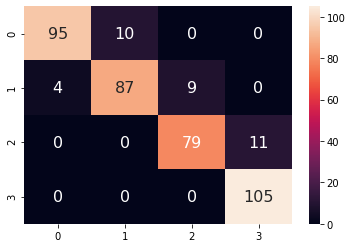

In [178]:
plot_matrix(y_test,predictions)

In [179]:
def score(y_test,predictions):
    print(classification_report(y_test,predictions))
    print(pd.DataFrame(predictions).value_counts())
    print("Accuracy score ={score}".format(score=accuracy_score(y_test,predictions)))
score(y_test,predictions)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        99
           1       0.87      0.90      0.88        97
           2       0.88      0.90      0.89        88
           3       1.00      0.91      0.95       116

    accuracy                           0.92       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.92      0.92      0.92       400

3    105
0    105
1    100
2     90
dtype: int64
Accuracy score =0.915


In [193]:
def plot_roc(y_test,predictions):
    actual_vals=pd.DataFrame(pd.get_dummies(y_test))
    predictions=pd.DataFrame(pd.get_dummies(predictions))
    print('0: {}'.format(predictions[predictions[0]==1][0].sum()))
    print('1 :{}'.format(predictions[predictions[1]==1][1].sum()))
    print('2 :{}'.format(predictions[predictions[2]==1][2].sum()))
    predictions.head()
    #compute roc curve and roc area for each curve
    fpr=dict()
    tpr=dict()
    roc_auc=dict()
    n_classes=4

    #loop for each class
    for i in range(n_classes):
        fpr[i],tpr[i],_=roc_curve(actual_vals.iloc[:,i],predictions.iloc[:,i])
        roc_auc[i]=auc(fpr[i],tpr[i])
    #micro-average roc curve
    fpr["micro"],tpr["micro"],_=roc_curve(actual_vals.to_numpy().ravel(),predictions.to_numpy().ravel())
    roc_auc["micro"]=auc(fpr["micro"],tpr["micro"])
    
    colors = ['aqua', 'darkorange', 'cornflowerblue','darkred']
    #main plotter
    lw=2
    plt.figure(figsize=(10,8))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)
    labels=['0','1','2','3']
    for i,color in zip(range(n_classes),colors):
         plt.plot(fpr[i], tpr[i], color=color,lw=lw,label='ROC curve of class {0} {name} (area = {area:0.2f})'
                 ''.format(i, name=labels[i],area=roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

0: 105
1 :100
2 :90


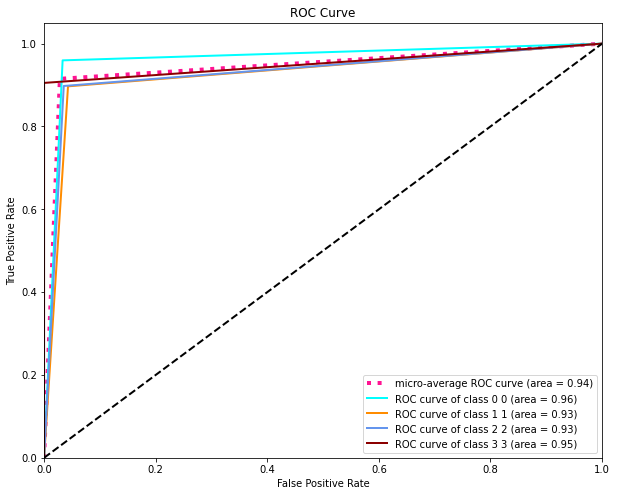

In [194]:
plot_roc(y_test,predictions)